<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ вакансий из HeadHunter
   

In [11]:
import pandas as pd
import psycopg2
import plotly.express as px
import matplotlib.pyplot as plt

# Юнит 3. Предварительный анализ данных

1. Напишите запрос, который посчитает количество вакансий в нашей базе (вакансии находятся в таблице vacancies). 

In [18]:
query_3_1 = f'''select count(id)
from vacancies
'''
df = pd.read_sql_query(query_3_1, connection)
df

C:\Users\Admin\AppData\Local\Temp\ipykernel_16444\526787613.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_3_1, connection)


,count
0,49197


Количество вакансий в базе - 49197, что является хорошей выборкой для нашего исследования и свидетельствует о том, что о безработице точно говорить не придется.

2. Напишите запрос, который посчитает количество работодателей (таблица employers). 

In [38]:
query_3_2 = f'''select count(id)
from employers
'''
df = pd.read_sql_query(query_3_2, connection)
df

C:\Users\Admin\AppData\Local\Temp\ipykernel_3308\1729308065.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_3_2, connection)


,count
0,23501


Число работодателей в базе - 23501, что также положительно характеризует выборку.

3. Посчитате с помощью запроса количество регионов (таблица areas).

In [26]:
query_3_3 = f'''select count(id)
from areas
'''
df = pd.read_sql_query(query_3_3, connection)
df

C:\Users\Admin\AppData\Local\Temp\ipykernel_3308\1942533940.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_3_3, connection)


,count
0,1362


Количество регионов - 1362, доволно широкий охват.

4. Посчитате с помощью запроса количество сфер деятельности в базе (таблица industries).

In [27]:
query_3_4 = f'''select count(id)
from industries
'''
df = pd.read_sql_query(query_3_4, connection)
df

C:\Users\Admin\AppData\Local\Temp\ipykernel_3308\1047853081.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_3_4, connection)


,count
0,294


Сфер деятельности в базе указано 294

Выводы: Судя по предварительному анализу данных на количество, работодатели как правило размещают несколько вакансий. Много регионов, где есть открытые вакансии, а также разных сфер деятельности, что говорит о довольно активном рынке вакансий на исследуемой территории, а также хорошей выборке для исследования. 

# Юнит 4. Детальный анализ вакансий

1. Напишите запрос, который позволит узнать, сколько (cnt) вакансий в каждом регионе (area).
Отсортируйте по количеству вакансий в порядке убывания.

In [3]:
query_4_1 = f'''select a.name as area, count(v.id) as cnt 
from areas as a
left join vacancies as v on a.id = v.area_id 
group by a.name 
order by 2 desc
'''
#соединяем справочник регионов с таблицей вакансий по ключу id, группируем по названию региона,
# так как нам нужно посмотреть разбивку количества вакансий по регионам и к этому столбцу не применяется функция

df = pd.read_sql_query(query_4_1, connection)
df

C:\Users\Admin\AppData\Local\Temp\ipykernel_8836\4112235734.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_4_1, connection)


,area,cnt
0,Москва,5333
1,Санкт-Петербург,2851
2,Минск,2112
3,Новосибирск,2006
4,Алматы,1892
...,...,...
1357,Багаевская,0
1358,Пролетарск,0
1359,Седельниково,0
1360,Инской,0


Топ 5 регионов по количеству открытых вакансий в базе:
1	Москва 5333
2	Санкт-Петербург	2851
3	Минск 2112
4	Новосибирск	2006
5	Алматы 1892

Мы видим, что в базе присутствуют вакансии, размещенные не только в России, но и в Беларуси и Казахстане, и логично, что большая их часть размещена в столицах.

2. Напишите запрос, чтобы определить у какого количества вакансий заполнено хотя бы одно из двух полей с зарплатой.

In [3]:
query_4_2 = f'''select count(id) as cnt_vac_sal
from vacancies
where (salary_from is not null) or (salary_to is not null)
'''
#используем условие where для того, чтобы отфильтровать таблицу по заполненности/незаполненности граф с зарплатой
df = pd.read_sql_query(query_4_2, connection)
df

C:\Users\Admin\AppData\Local\Temp\ipykernel_11792\3169555833.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_4_2, connection)


,cnt_vac_sal
0,24073


Хотя бы одно из двух полей с зарплатой указано у 24073 вакансий. Это значит, что почти в половине вакансий отсутствуют данные о зарплате. Хорошо ли это?:) Возможно, работодатели не готовы однозначно оценить потенциального сотрудника и варьируют заработную плату в зависимости от компетентности сотрудника. Это также говорит о том, что большая часть работодателей - это не госсектор, где есть четко установленные оклады.

3. Найдите средние значения для нижней и верхней границы зарплатной вилки. Округлите значения до целого.

In [4]:
query_4_3 = f'''select round(avg(salary_from)) avg_salary_from, round(avg(salary_to)) avg_salary_to
from vacancies
'''
df = pd.read_sql_query(query_4_3, connection)
df

C:\Users\Admin\AppData\Local\Temp\ipykernel_11792\3947418207.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_4_3, connection)


,avg_salary_from,avg_salary_to
0,71065.0,110537.0


В среднем нижняя граница вилки предлагаемых зарплат равна 71065 р., а верхняя - 110537 р. В целом, обещаемый уровень зарплат довольно высокий.

4. Напишите запрос, который выведет количество вакансий для каждого сочетания типа рабочего графика (schedule) и типа трудоустройства (employment), используемого в вакансиях. Результат отсортируйте по убыванию количества.


In [19]:
query_4_4 = f'''select schedule, employment, count(id)
from vacancies
group by schedule, employment
order by 3 desc
'''
#группируем данные по тем признакам, к которым не применяется агрегирующая функция
df = pd.read_sql_query(query_4_4, connection)
df

C:\Users\Admin\AppData\Local\Temp\ipykernel_11792\336583200.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_4_4, connection)


,schedule,employment,count
0,Полный день,Полная занятость,35367
1,Удаленная работа,Полная занятость,7802
2,Гибкий график,Полная занятость,1593
3,Удаленная работа,Частичная занятость,1312
4,Сменный график,Полная занятость,940
5,Полный день,Стажировка,569
6,Вахтовый метод,Полная занятость,367
7,Полный день,Частичная занятость,347
8,Гибкий график,Частичная занятость,312
9,Полный день,Проектная работа,141


Всего 18 комбинаций рабочего графика и типа трудоустройства - топ три - это полная занятость и полный день, удаленная работа или гибкий график. Анализ отражает тенденцию нового времени - удаленная работа предлагается в 15% случаев. Самые непопулярные предложения - проектная работа в комбинации со сменным графиком или вахтовым методом, то есть предпочтение отдается в основном стандартной консервативной практике постоянного найма. 

5. Напишите запрос, выводящий значения поля Требуемый опыт работы (experience) в порядке возрастания количества вакансий, в которых указан данный вариант опыта. 

C:\Users\Admin\AppData\Local\Temp\ipykernel_16444\1298711342.py:6: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



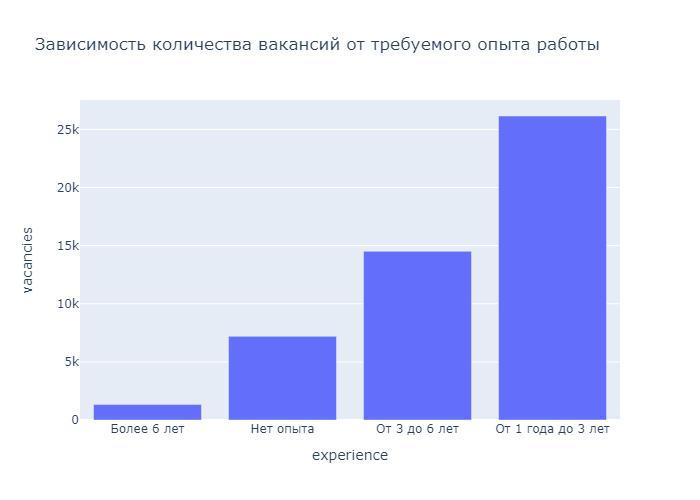

In [22]:
query_4_5 = f'''select experience, count(id) vacancies
from vacancies
group by experience
order by count(id)
'''
df1 = pd.read_sql_query(query_4_5, connection)
df1
fig = px.bar(df1, x = 'experience', y='vacancies',title= "Зависимость количества вакансий от требуемого опыта работы")
#fig.write_image('data/img1.png')
fig.show('png')

Наиболее часто требуемый опыт работы - от 1 года до 3 лет, довольно много вакансий (15%) без требуемого опыта работы. Это опровергает расхожее мнение о том, что без опыта работы или с небольшим опытом найти почти невозможно. 

***

Лидеры по количеству вакансий - Москва, Санкт-Петербург и Минск. Традиционно больше всего требуются сотрудники
на полный рабочий день и полную занятость, однако, одна из современнных тенденций - удалённая работа занимет второе место 
по количеству предлагаемых вакансий. Средняя заработная плата от 71 тыс.руб. до 110,5 тыс.руб. - это,
скорее всего, характеристики зарплат в крупных городах, где и размещена основная доля вакансий. Идеальный требуемый стаж работы -
от 1 года до 3 лет, что может свидетельствовать о том, что преимущественно требуются молодые, активные сотрудники.

# Юнит 5. Анализ работодателей

1. Напишите запрос, который позволит узнать, какие работодатели находятся на первом и пятом месте по количеству вакансий.

C:\Users\Admin\AppData\Local\Temp\ipykernel_16444\199657973.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df2 = pd.read_sql_query(query_5_1, connection)


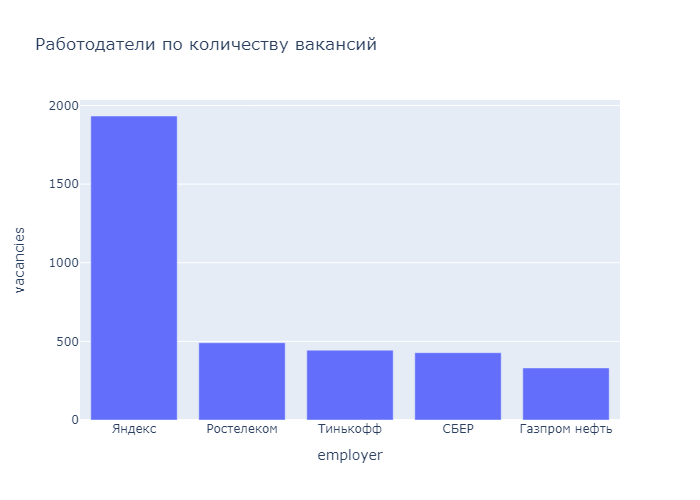

In [19]:
query_5_1 = f'''select e.name as employer, count(v.id) as vacancies
from employers as e
join vacancies as v on e.id = v.employer_id 
group by e.name
order by 2 desc
limit 5
''' 
df2 = pd.read_sql_query(query_5_1, connection)
df2
fig1 = px.bar(df2, x = 'employer', y='vacancies',title= "Работодатели по количеству вакансий")
#fig1.write_image('data/img2.png')
fig1.show('png')

На первом месте по количеству вакансий находится Яндекс, что не удивительно при огромном количестве предоставляемых этой компанией сервисов. Ростелеком, Тинькофф и Сбер - это тоже крупнейшие игроки на рынке труда, это подтверждает адекватность данных. Замыкает пятерку Газпромнефть. В основном, крупнейшие работодатели - это поставщики услуг, по болшей части финтех или коммуникационных.

2. Напишите запрос, который для каждого региона выведет количество работодателей и вакансий в нём.
Среди регионов, в которых нет вакансий, найдите тот, в котором наибольшее количество работодателей.


In [20]:
query_5_2 = f'''select a.name as area, count(v.id) as cnt_vac, count (e.id) as cnt_employers
from areas as a
left join employers as e on e.area = a.id
left join vacancies as v on v.area_id = a.id
where v.id is null
group by a.name
order by 3 desc
limit 10
'''
#соединяем справочник регионов со справочником работодателей и таблицей вакансий по ключам, по тем регионам (where), где нет вакансий
df3 = pd.read_sql_query(query_5_2, connection)
df3

C:\Users\Admin\AppData\Local\Temp\ipykernel_8488\4078993354.py:11: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,area,cnt_vac,cnt_employers
0,Россия,0,410
1,Казахстан,0,207
2,Московская область,0,75
3,Краснодарский край,0,19
4,Беларусь,0,18
5,Ростовская область,0,18
6,Азербайджан,0,17
7,Нижегородская область,0,16
8,Республика Татарстан,0,16
9,Узбекистан,0,15


Здесь можно сказать, что в справочнике регионов есть названия не только населенных пунктов, но и стран и областей, и соответственно, в справочнике работодателей может быть указан регион на уровне страны или области. Большая часть работодателей, зарегистрированных в HH - это работодатели из стран СНГ или ближайшего зарубежья. Основная часть, конечно, из России. 

3. Для каждого работодателя посчитайте количество регионов, в которых он публикует свои вакансии. Отсортируйте результат по убыванию количества.


C:\Users\Admin\AppData\Local\Temp\ipykernel_16444\1065776057.py:8: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,employer,cnt_areas
0,Яндекс,181
1,Ростелеком,152
2,Спецремонт,116
3,Поляков Денис Иванович,88
4,ООО ЕФИН,71
5,Совкомбанк,63


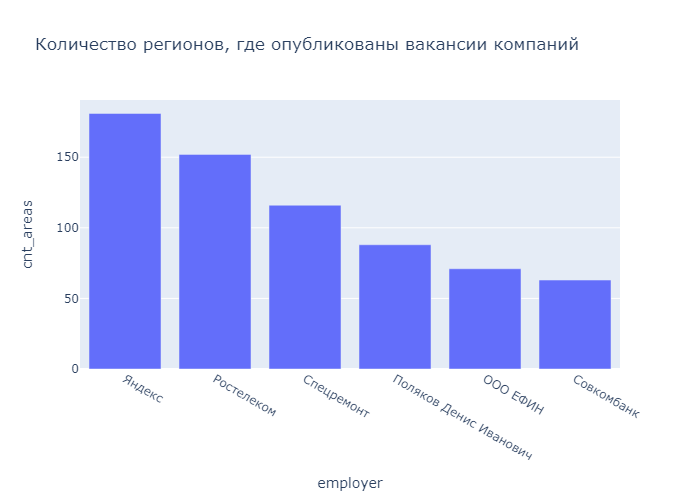

In [20]:
query_5_3 = f'''select e.name as employer, count(distinct v.area_id) as cnt_areas
from employers as e
left join vacancies as v on e.id = v.employer_id 
group by e.name
order by 2 desc
limit 6
'''
df5 = pd.read_sql_query(query_5_3, connection)
display(df5)
fig5 = px.bar(df5, x = 'employer', y='cnt_areas',title= "Количество регионов, где опубликованы вакансии компаний ")
#fig5.write_image('data/img3.png')
fig5.show('png')

Топ самых распространенных по регионам работодателей - Яндекс, Ростелеком, Спецремонт, ИП Поляков, ООО ЕФИН. Интересно узнать сферы деятельности или вакансии, которые предлагают последние три компании.

In [36]:
query_5_31 = f'''select e.name as employer, v.name
from employers as e
left join vacancies as v on e.id = v.employer_id
where lower(e.name) like '%ефин%' 
limit 5
'''
#подставляем в условие like названия интересующих нас компаний и проверяем, что за вакансии они предлагают
df6 = pd.read_sql_query(query_5_31, connection)
df6

C:\Users\Admin\AppData\Local\Temp\ipykernel_16624\19689846.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df6 = pd.read_sql_query(query_5_31, connection)


,employer,name
0,ООО ЕФИН,Ведущий программист 1C
1,ООО ЕФИН,Ведущий программист 1C
2,ООО ЕФИН,Ведущий программист 1C
3,ООО ЕФИН,Ведущий программист 1C
4,ООО ЕФИН,Ведущий программист 1C


Если подставить соответствующее название в код выше, то выясним, что компания Спецремонт предлагает вакансии по ремонту компьютерной техники и ИП Поляков тоже, ООО ЕФИН требуются e-com специалисты, программисты 1С. Итого: самые распространенные требуемые профессии - в сфере IT.

4. Напишите запрос для подсчёта количества работодателей, у которых не указана сфера деятельности. 

In [7]:
query_5_4 = f'''select count(e.id)
from employers as e
left join employers_industries as ei on e.id = ei.employer_id 
where ei.industry_id is null
'''
df = pd.read_sql_query(query_5_4, connection)
df

C:\Users\Admin\AppData\Local\Temp\ipykernel_10184\1142381488.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_5_4, connection)


,count
0,8419


У довольно значительного числа работодателей не указана сфера деятельности, их число - 8419, это почти 17%. Интересно было бы провести исследование и узнать, почему так происходит.

5. Напишите запрос, чтобы узнать название компании, находящейся на третьем месте в алфавитном списке (по названию) компаний, у которых указано четыре сферы деятельности. 

In [21]:
query_5_5 = f'''select e.name, count(ei.industry_id) as cnt_industries
from employers as e
left join employers_industries as ei on e.id = ei.employer_id 
group by e.name
having count(distinct ei.industry_id) = 4
order by e.name
limit 10
'''
#используем оператор having для фильтра признака, к которому применена функция
df = pd.read_sql_query(query_5_5, connection)
df

C:\Users\Admin\AppData\Local\Temp\ipykernel_11792\2931800526.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_5_5, connection)


,name,cnt_industries
0,101 Интернет,4
1,21vek.by,4
2,2ГИС,4
3,2К,4
4,4 пикселя +,4
5,5lb,4
6,5 Армия,4
7,741 Studios,4
8,AAEngineering Group,4
9,ADAPTER,4


У многих компаний указано по 4 сферы деятельности, одна из которых 2ГИС. И в целом, компании, занимающиеся интернет технологиями и цифровыми продуктами указывают не одну сферу деятельности, что может говорить о том, что новые цифровые профессии не укладываются в рамки просто it-специалиста, это теперь индустрия с множеством разных профессий.

6. С помощью запроса выясните, у какого количества работодателей в качестве сферы деятельности указана Разработка программного обеспечения.


In [12]:
query_5_6 = f'''select count(ei.employer_id) as employers_programmers
from employers_industries as ei
join industries as i on i.id = ei.industry_id
where i.name = 'Разработка программного обеспечения'
'''
df = pd.read_sql_query(query_5_6, connection)
df

C:\Users\Admin\AppData\Local\Temp\ipykernel_9532\3308076852.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_5_6, connection)


,employers_programmers
0,3553


3553 работодателей указали в качестве сферы деятельности разработку программного обеспечения, что составляет примерно 7%. Профессия программиста вполне популярна.

7. Для компании «Яндекс» выведите список регионов-миллионников, в которых представлены вакансии компании, вместе с количеством вакансий в этих регионах. Также добавьте строку Total с общим количеством вакансий компании. Результат отсортируйте по возрастанию количества.

Список городов-милионников надо взять [отсюда](https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8). 

Если возникнут трудности с этим задание посмотрите материалы модуля  PYTHON-17. Как получать данные из веб-источников и API. 

In [22]:
import requests # Импортируем библиотеку requests
from bs4 import BeautifulSoup # Импортируем библиотеку BeautifulSoup
url = 'https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8#%D0%A1%D0%BF%D0%B8%D1%81%D0%BE%D0%BA_%D0%B3%D0%BE%D1%80%D0%BE%D0%B4%D0%BE%D0%B2-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D0%BE%D0%B2' 
# Определяем значение URL страницы для запроса
response = requests.get(url) # Делаем GET-запрос к ресурсу и результат ответа сохраняем в переменной response
page = BeautifulSoup(response.text, 'html.parser') # Создаём объект BeautifulSoup, указывая html-парсер
links = page.find_all('a') #ищем названия всех ссылок, в html ссылки указаныпо тегу <a>
cities_millionairs = tuple([link.text for link in links[52:68]])#выбираем ссылки на города, переводим список городов в кортеж, 
#потом нам это понадобится при работе с оператором IN в SQL
print(cities_millionairs) 

('Москва', 'Санкт-Петербург', 'Новосибирск', 'Екатеринбург', 'Казань', 'Нижний Новгород', 'Красноярск', 'Челябинск', 'Самара', 'Уфа', 'Ростов-на-Дону', 'Краснодар', 'Омск', 'Воронеж', 'Пермь', 'Волгоград')


In [27]:
query_5_7 = f'''WITH temp AS (select a.name as area_name, count(distinct v.id) as cnt_vac
from vacancies as v
join employers as e on e.id = v.employer_id 
left join areas as a on a.id = v.area_id
where e.name = 'Яндекс' and a.name in {cities_millionairs}
group by a.name
order by 2 desc
)
select * from temp
union all
select 'total', sum(cnt_vac) from temp
'''
#присоединяем таблицу работодателей по ключу к таблице вакансий, а также присоединяем таблицу регионов с помощью left join,
#чтобы были только те регионы, где есть вакансии, по одному работодателю (where) - Яндекс. Имя региона выбираем с помощью оператора IN 
#из заранее подготовленного кортежа в коде выше (список городов-миллионников, скачанный из статьи в Википедии). С помощью оператора WITH ..AS
#присоединяем 'total'
df4 = pd.read_sql_query(query_5_7, connection)
display(df4)


C:\Users\Admin\AppData\Local\Temp\ipykernel_8488\533487974.py:17: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,area_name,cnt_vac
0,Москва,54.0
1,Санкт-Петербург,42.0
2,Екатеринбург,39.0
3,Нижний Новгород,36.0
4,Новосибирск,35.0
5,Воронеж,32.0
6,Краснодар,30.0
7,Самара,26.0
8,Уфа,26.0
9,Казань,25.0


Вакансии компании Яндекс размещены во всех городах миллионниках, общее количество вакансий Яндекс в таких регионах - 485. Яндекс по праву может считаться самым главным работодателем.

***

Топ работодателей по количеству размещенных вакансий (Яндекс, Ростелеком и Тинькофф) - это компании - лидеры услуг, в том числе цифровых. Самое широкое покрытие регионов у Яндекса. Примерно треть работодателей не указывает свою сферу деятельности. У довольно большого количества работодателей сфера деятельности - разработка программного обеспечения - это примерно 15% от всех зарегистрированных работодателей. 

# Юнит 6. Предметный анализ

1. Сколько вакансий имеет отношение к данным?

Считаем, что вакансия имеет отношение к данным, если в её названии содержатся слова 'data' или 'данн'.

*Подсказка: Обратите внимание, что названия вакансий могут быть написаны в любом регистре.* 


In [26]:
query_6_1= f'''select count(id) as data_vac
from vacancies
where lower(name) like '%data%' or lower(name) like '%данн%'
'''
#приводим искомые части строк к нижнему регистру, чтобы найти всевозможные варианты их написания 
df = pd.read_sql_query(query_6_1, connection)
df

C:\Users\Admin\AppData\Local\Temp\ipykernel_11792\304550143.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_6_1, connection)


,data_vac
0,1771


Всего вакансий, связанных с данными - 1771. Около 4% от общего числа, это довольно значительная часть.

In [10]:
query_6_11= f'''select a.name, count(v.id) as data_vac
from vacancies as v
left join areas as a on a.id = v.area_id
where lower(v.name) like '%data%' or lower(v.name) like '%данн%'
group by a.name
order by 2 desc
limit 10
'''
df = pd.read_sql_query(query_6_11, connection)
df

C:\Users\Admin\AppData\Local\Temp\ipykernel_16624\2759436127.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_6_11, connection)


,name,data_vac
0,Москва,619
1,Санкт-Петербург,164
2,Алматы,105
3,Минск,89
4,Новосибирск,57
5,Нур-Султан,55
6,Казань,53
7,Нижний Новгород,42
8,Краснодар,36
9,Екатеринбург,35


Дополнительная проверка распространения вакансий, связанных с данными, по регионам неожиданных результатов не дала. Работу, связанную с исследрванием данных, проще всего найти в городах миллиониках, лидерами, конечно, являются Москва и Санкт-Петербург.

2. Сколько есть подходящих вакансий для начинающего дата-сайентиста? 
Будем считать вакансиями для дата-сайентистов такие, в названии которых есть хотя бы одно из следующих сочетаний:
* 'data scientist'
* 'data science'
* 'исследователь данных'
* 'ML' (здесь не нужно брать вакансии по HTML)
* 'machine learning'
* 'машинн%обучен%'

** В следующих заданиях мы продолжим работать с вакансиями по этому условию.*

Считаем вакансиями для специалистов уровня Junior следующие:
* в названии есть слово 'junior' *или*
* требуемый опыт — Нет опыта *или*
* тип трудоустройства — Стажировка.
 

In [27]:
query_6_2= f'''select count(id) as DS_vac
from vacancies
where (lower(name) like'%data scientist%' or lower(name) like '%data science%' 
or lower(name) like '%исследователь данных%' or name like '%ML%'
or lower(name) like '%machine learning%' or lower(name) like '%машинн%обучен%')
and  (lower(name) not like '%html%') and
(lower(name) like '%junior%' or experience = 'Нет опыта' or employment = 'Стажировка') 
'''
#все искомые части строк в названии вакансии, кроме ML, приводим к общему (нижнему) регистру,
# чтобы посчитать все вхождения с разными регистрами
df = pd.read_sql_query(query_6_2, connection)
df

C:\Users\Admin\AppData\Local\Temp\ipykernel_11792\190496608.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_6_2, connection)


,ds_vac
0,51


In [55]:
query_6_22= f'''select count(id) as DS_vac
from vacancies
where (lower(name) like'%data scientist%' or lower(name) like '%data science%' 
or lower(name) like '%исследователь данных%' or name like '%ML%'
or lower(name) like '%machine learning%' or lower(name) like '%машинн%обучен%')
and  (lower(name) not like '%html%')
'''
#все искомые части строк в названии вакансии, кроме ML, приводим к общему (нижнему) регистру,
# чтобы посчитать все вхождения с разными регистрами
df = pd.read_sql_query(query_6_22, connection)
df

C:\Users\Admin\AppData\Local\Temp\ipykernel_16624\3492153003.py:10: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,ds_vac
0,480


Всего вакансий DS 480. Для начинающего дата сайентиста найдена 51 вакансия. Профессия довольно востребованная и то, что более 10% требуется  начинающих, может свидетельствовать о том, что она новая и уже опытных сотрудников не так много.

C:\Users\Admin\AppData\Local\Temp\ipykernel_16444\179743856.py:12: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,schedule,ds_vacancies
0,Полный день,322
1,Удаленная работа,115
2,Гибкий график,43


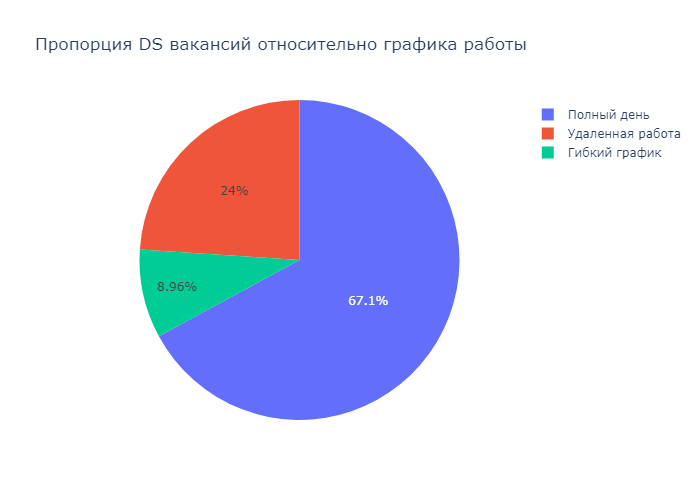

In [21]:
query_6_21= f'''select distinct schedule, count(id) as DS_vacancies
from vacancies
where (lower(name) like'%data scientist%' or lower(name) like '%data science%' 
or lower(name) like '%исследователь данных%' or name like '%ML%'
or lower(name) like '%machine learning%' or lower(name) like '%машинн%обучен%')
and  (lower(name) not like '%html%') 
group by schedule
order by 2 desc
'''
#все искомые части строк в названии вакансии, кроме ML, приводим к общему (нижнему) регистру,
# чтобы посчитать все вхождения с разными регистрами
df = pd.read_sql_query(query_6_21, connection)
display(df)
fig = px.pie(df, values='ds_vacancies', names='schedule', title='Пропорция DS вакансий относительно графика работы')
#fig.write_image('data/img4.png')
fig.show('png')

Несмотря на то, что DS  - это цифровая профессия, удаленную работу предлагают только в 24% случаев.

3. Сколько есть вакансий для DS, в которых в качестве ключевого навыка указан SQL или postgres?

** Критерии для отнесения вакансии к DS указаны в предыдущем задании.*

In [42]:
query_6_3= f'''select count(id) as sql_vac
from vacancies
where (lower(name) like'%data scientist%' or lower(name) like '%data science%'
or lower(name) like '%исследователь данных%' or name like '%ML%'
or lower(name) like '%machine learning%' or lower(name) like '%машинн%обучен%')
and  (lower(name) not like '%html%') and
(lower(key_skills) like '%sql%' or lower(key_skills) like '%postgres%') 
'''
df = pd.read_sql_query(query_6_3, connection)
df

C:\Users\Admin\AppData\Local\Temp\ipykernel_16624\1330214501.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_6_3, connection)


,sql_vac
0,201


В 201 вакансии требуется сотрудник со знанием SQL или Postgres, это примерно 11% от всех вакансий DS, то есть эти навыки востребованы на рынке.

4. Проверьте, насколько популярен Python в требованиях работодателей к DS.Для этого вычислите количество вакансий, в которых в качестве ключевого навыка указан Python.

** Это можно сделать помощью запроса, аналогичного предыдущему.*

In [51]:
query_6_4= f'''select count(id) as sql_vac
from vacancies
where (lower(name) like'%data scientist%' or lower(name) like '%data science%'
or lower(name) like '%исследователь данных%' or name like '%ML%'
or lower(name) like '%machine learning%' or lower(name) like '%машинн%обучен%')
and  (lower(name) not like '%html%') and
(lower(key_skills) like '%python%') 
'''
df = pd.read_sql_query(query_6_4, connection)
df

C:\Users\Admin\AppData\Local\Temp\ipykernel_11556\3806477118.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_6_4, connection)


,sql_vac
0,351


Знание Python еще более востребованный навык для профессии DS  -  в 351 вакансиях, то есть в 20% случаев.

5. Сколько ключевых навыков в среднем указывают в вакансиях для DS?
Ответ округлите до двух знаков после точки-разделителя.

In [3]:
query_6_5= f'''select round(avg(length(key_skills) - length(replace(key_skills,'\t',''))+1),2) as cnt_skills
from vacancies
where (lower(name) like'%data scientist%' or lower(name) like '%data science%'
or lower(name) like '%исследователь данных%' or name like '%ML%'
or lower(name) like '%machine learning%' or lower(name) like '%машинн%обучен%')
and  (lower(name) not like '%html%') 
'''
df = pd.read_sql_query(query_6_5, connection)
df

C:\Users\Admin\AppData\Local\Temp\ipykernel_13688\2612601232.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_6_5, connection)


,cnt_skills
0,6.41


В среднем в вакансиях DS указывают около 6 необходимых навыков, что говорит о том, что специалист по данным - понятие широкое, однако, основные навыки уже вполне определимы.

6. Напишите запрос, позволяющий вычислить, какую зарплату для DS в **среднем** указывают для каждого типа требуемого опыта (уникальное значение из поля *experience*). 

При решении задачи примите во внимание следующее:
1. Рассматриваем только вакансии, у которых заполнено хотя бы одно из двух полей с зарплатой.
2. Если заполнены оба поля с зарплатой, то считаем зарплату по каждой вакансии как сумму двух полей, делённую на 2. Если заполнено только одно из полей, то его и считаем зарплатой по вакансии.
3. Если в расчётах участвует null, в результате он тоже даст null (посмотрите, что возвращает запрос select 1 + null). Чтобы избежать этой ситуацию, мы воспользуемся функцией [coalesce](https://postgrespro.ru/docs/postgresql/9.5/functions-conditional#functions-coalesce-nvl-ifnull), которая заменит null на значение, которое мы передадим. Например, посмотрите, что возвращает запрос `select 1 + coalesce(null, 0)`

Выясните, на какую зарплату в среднем может рассчитывать дата-сайентист с опытом работы от 3 до 6 лет. Результат округлите до целого числа. 

In [31]:
query_6_6= f'''select distinct experience, round(avg((coalesce(salary_from,salary_to) + coalesce(salary_to,salary_from))/2)) as avg_salary
from vacancies
where (lower(name) like'%data scientist%' or lower(name) like '%data science%'
or lower(name) like '%исследователь данных%' or name like '%ML%'
or lower(name) like '%machine learning%' or lower(name) like '%машинн%обучен%')
and  (lower(name) not like '%html%') and ((salary_from is not null) or (salary_to is not null))
group by experience
'''
#используем функцию coalesce для получения первого аргумента, не равного null. Таким образом, мы либо складываем две границы, либо,
# если какая-то граница зарплаты не указана, то удваиваем другую границу и потом делим на два, чтобыполучить среднее 
df = pd.read_sql_query(query_6_6, connection)
df
connection.close()

C:\Users\Admin\AppData\Local\Temp\ipykernel_11792\2617370132.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_6_6, connection)


,experience,avg_salary
0,Нет опыта,74643.0
1,От 1 года до 3 лет,139675.0
2,От 3 до 6 лет,243115.0


Этот анализ дает нам представление об уровне зарплат, предлагаемых дата сайентистам. Средняя зарплата DS с опытом работы от 3 до 6 лет более 240 тыс. руб, что в целом, довольно высоко для исследуемых регионов.

In [23]:
query_6_61= f'''select distinct a.name, round(avg((coalesce(v.salary_from, v.salary_to) + coalesce(v.salary_to, v.salary_from))/2)) as avg_salary, count(v.id) as cnt
from vacancies as v
left join areas as a on a.id = v.area_id
where (lower(v.name) like'%data scientist%' or lower(v.name) like '%data science%'
or lower(v.name) like '%исследователь данных%' or v.name like '%ML%'
or lower(v.name) like '%machine learning%' or lower(v.name) like '%машинн%обучен%')
and  (lower(v.name) not like '%html%') and ((v.salary_from is not null) or (v.salary_to is not null))
group by a.name
order by 2 desc
'''
#используем функцию coalesce для получения первого аргумента, не равного null. Таким образом, мы либо складываем две границы, либо,
# если какая-то граница зарплаты не указана, то удваиваем другую границу и потом делим на два, чтобыполучить среднее 
df = pd.read_sql_query(query_6_61, connection)
df

C:\Users\Admin\AppData\Local\Temp\ipykernel_16624\313792585.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_6_61, connection)


,name,avg_salary,cnt
0,Кипр,300000.0,1
1,Армения,268863.0,3
2,Сербия,233794.0,1
3,Турция,233794.0,1
4,Черногория,233794.0,1
5,Москва,207630.0,27
6,Белгород,200000.0,1
7,Санкт-Петербург,173335.0,7
8,Новосибирск,166333.0,3
9,Рязань,136667.0,3


Самые высокие зарплаты для дата сайентистов на HH предлагаются на Кипре, в Армении, Сербии, Турции и Черногории, замыкает пятерку лидеров Москва. 

Профессия Data Science - довольно широкое понятие, часто включающее большое число навыков, среди которых Python, SQL или Postgres. Судя по нашим данным эта профессия широко востребована на рынке труда, довольно высокий уровень зарплат предлагается даже начиннающим дата сайентистам. 

# Общий вывод по проекту

Лидерами по размещенным на HH вакансиям являются крупные компании, предоставляющие цифровые, финтех и коммугикационные услуги, соответственно, ищущие специалистов цифровых профессий, такие как Яндекс и Ростелеком. Рынок труда в городах-миллионниках значительно отличается от рынка труда в других регионах - основная доля вакансий представлена в крупных городах. Одна из современных тенденций - довольно значительная часть предложений удаленной работы, но в целом, по-прежнему лидирует классический график работы - постоянная и на полный день. Дата сайентист - молодая очень востребованная высокооплачиваемая профессия, требующая совмещения комплекса знаний, и не всегда однозначно описываемая, однако, судя по частоте некоторых указываемых стандартных требуемых навыков (Python, SQL, Postgres, ML), приобретающая постепенно четкое описание. Найти работу начинающему специалисту DS в крупном городе - вполне реализуемая задача.